In [1]:
from multiprocessing import Pool
import numpy as np
import matplotlib.pylab as plt
from XY_diagonalisation import Computations_XY_model as XY_model
from tqdm.notebook import tqdm
from IPython.display import clear_output
import time
from XY_diagonalisation import Plot_XY_Computations as XY_model_plotting
from functools import partial

In [2]:
XY_model.N_size=50001
with Pool(3) as p:
    Fourier_ground=partial(XY_model.Simple_Fourier_Transform ,Ground=False) # prod_x has only one argument x (y is fixed to 10)
    Data =np.array(p.map(Fourier_ground,range(500)))

In [4]:
fluctuations_rms = []
for L in range(100,2000,20):
    print(L,end="\r")
    S_toe,fermi = XY_model.Compute_Spectrum_Random_Distribution_Associated(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),L)    
    fluctuations_rms.append(np.square(np.array(S_toe)-np.array(fermi)).sum())
fluctuations_abs = []
for L in range(100,2000,20):
    print(L,end="\r")
    S_toe,fermi = XY_model.Compute_Spectrum_Random_Distribution_Associated(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),L)    
    fluctuations_abs.append(np.abs(np.array(S_toe)-np.array(fermi)).sum())

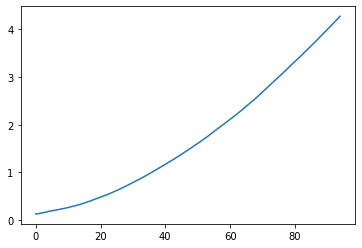

In [5]:
plt.plot(fluctuations_abs)

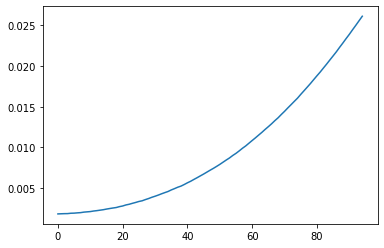

In [6]:
plt.plot(fluctuations_rms)

In [14]:

S=XY_model.Compute_Spectrum_Random_State_Toeplitz(Data[:,:,1].mean(axis=0),50)
S_circ=XY_model.Compute_Spectrum_Random_State_Toeplitz(Data[:,:,1].mean(axis=0),50,Circulant=True)
S_toe,fermi = XY_model.Compute_Spectrum_Random_Distribution_Associated(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),50)

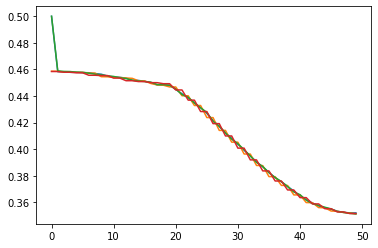

In [18]:
plt.plot(S)
plt.plot(S_circ)
plt.plot(S_toe)
plt.plot(fermi)

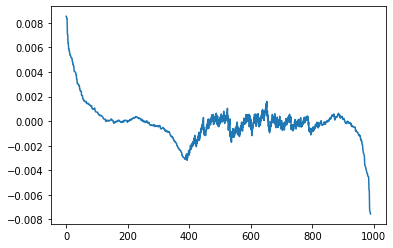

In [20]:
for L in range(10,1000,10):
    S=XY_model.Compute_Spectrum_Random_State_Toeplitz(Data[:,:,1].mean(axis=0),L)
    S_circ=XY_model.Compute_Spectrum_Random_State_Toeplitz(Data[:,:,1].mean(axis=0),L,Circulant=True)
    S_toe,fermi = XY_model.Compute_Spectrum_Random_Distribution_Associated(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),L)
    plt.plot(S_circ-fermi)
    plt.show()
    clear_output(wait=True)